In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import os 
from data_viz import plot_confusion_matrix, save_classification_report_as_image, save_probability_histplot

## Select only data from sign up form

In [2]:
# Load your dataframe
dataset_name = r"BastianLewisData_final.csv"
data_dir = r"C:\Users\peter\Projects\HR_Forecasting\data"
df = pd.read_csv(os.path.join(data_dir,dataset_name))

# Remove stage, status, groupid, 'berekening'
cols = [col for col in df.columns.to_list() if col not in ['stage','status','groupid', 'berekening']]
cols = [col for col in cols if "GroupTitle" not in col]
cols = [col for col in cols if "StageTitle" not in col]

df = df[cols]

In [3]:
cols = [col for col in df.columns.to_list() if "uitkomstTelefonischDeal" not in col]
cols = [col for col in df.columns.to_list() if "uitkomstTelefonischContact" not in col]

df = df[cols]

In [4]:
# fill missings 999
df = df.fillna(999)

# Prepare the data
# Replace 'target' with the name of your target column
X = df.drop(columns='starter')
y = df['starter']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
class_names = ["dropout", "starter"]


## create model 

c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       799
           1       0.08      0.63      0.14        27

    accuracy                           0.75       826
   macro avg       0.53      0.69      0.50       826
weighted avg       0.95      0.75      0.83       826



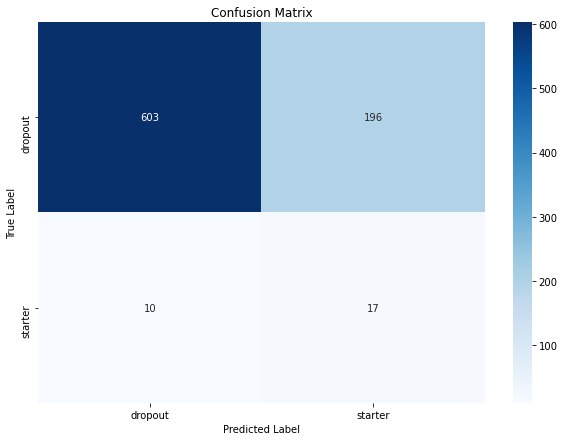

In [5]:
# Initialize and train the Balanced Random Forest model
brf = BalancedRandomForestClassifier(n_estimators=80, random_state=42)
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

# Evaluate the model
print('Classification Report:')
cr = classification_report(y_test, y_pred)
print(cr)


# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names)

In [6]:
# Initialize the model
brf = BalancedRandomForestClassifier(n_estimators=100)

# Apply RFE
rfe = RFE(estimator=brf, n_features_to_select=10)  # Adjust n_features_to_select as needed
rfe.fit(X_train, y_train)

# Transform the dataset with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the Balanced Random Forest with selected features
brf.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred_rfe = brf.predict(X_test_rfe)
y_proba_rfe = brf.predict_proba(X_test_rfe)[:, 1]


c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\peter

Classification Report with RFE:
{'0': {'precision': 0.9932088285229203, 'recall': 0.7321652065081352, 'f1-score': 0.8429394812680117, 'support': 799.0}, '1': {'precision': 0.0970464135021097, 'recall': 0.8518518518518519, 'f1-score': 0.17424242424242423, 'support': 27.0}, 'accuracy': 0.7360774818401937, 'macro avg': {'precision': 0.545127621012515, 'recall': 0.7920085291799935, 'f1-score': 0.5085909527552179, 'support': 826.0}, 'weighted avg': {'precision': 0.9639153839641287, 'recall': 0.7360774818401937, 'f1-score': 0.8210813450214126, 'support': 826.0}}


PermissionError: [Errno 13] Permission denied: 'C:\\model_3_classification_report.png'

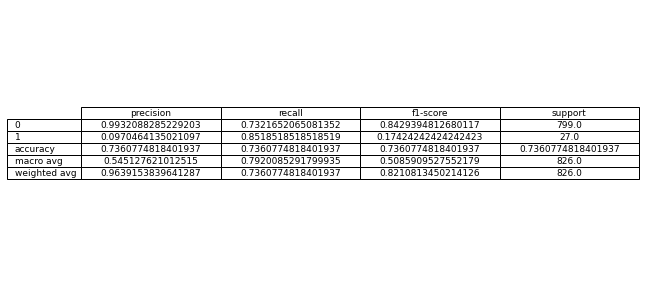

In [7]:
model_name = "model_3"

# Print the classification report and plot confusion matrix
print('Classification Report with RFE:')
cr = classification_report(y_test, y_pred_rfe, output_dict=True)
print(cr)

metrics_dir = r'C:\Users\peter\Projects\HR_Forecasting\models\model_metrics'
file_path = os.path.join(metrics_dir, f'\{model_name}_classification_report.png')

save_classification_report_as_image(cr, filename=file_path, figsize=(10, 5), dpi=300)
cm_rfe = confusion_matrix(y_test, y_pred_rfe)
plot_confusion_matrix(cm_rfe, class_names, filename=r'C:\Users\peter\Projects\HR_Forecasting\models\model_metrics\model1_confusion_matrix.png', dpi=300)

In [ ]:
print(f"number of candidates: {len(df)}")
print(f"number of columns: {len(df.columns)}")

number of candidates: 4129
number of columns: 432


Classification Report with RFE:
              precision    recall  f1-score   support

           0       1.00      0.42      0.60       799
           1       0.05      0.96      0.10        27

    accuracy                           0.44       826
   macro avg       0.53      0.69      0.35       826
weighted avg       0.97      0.44      0.58       826



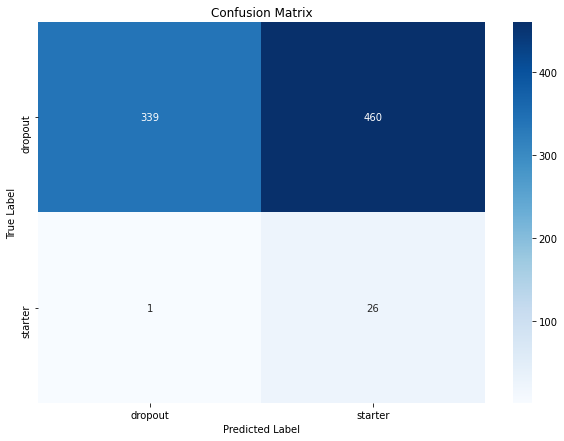

In [ ]:
threshold = 0.25
y_pred_custom = (y_proba_rfe >= threshold).astype(int)

# Print the classification report and plot confusion matrix
print('Classification Report with RFE:')
print(classification_report(y_test, y_pred_custom))

cm_rfe = confusion_matrix(y_test, y_pred_custom)
plot_confusion_matrix(cm_rfe, class_names)

In [ ]:
selected_features = X_train.columns[rfe.support_].tolist()
selected_features

['cdate',
 'recruitercode',
 'belafspraak',
 'leeftijd',
 'geboortedatum',
 'Verloning marge stopper of W&S overname',
 'jaar_ervaring',
 'diff_days',
 'Voorkeursbranche_elektrotechniek',
 'Voorkeursbranche_installatietechniek']

In [ ]:
from datetime import datetime
meta_dict = {"model_type":"brf_rfe",
               "date_created":str(datetime.today().date()),
               "selected_features": selected_features,
               "all_columns": df.columns.to_list(),
               "data_selection": "post_form",
                "dataset":dataset_name}
import json 
with open(r'C:\Users\peter\Projects\HR_Forecasting\models\model_3_meta.json', "w") as file:
    json.dump(meta_dict, file)

import pickle
with open(r'C:\Users\peter\Projects\HR_Forecasting\models\model_3.pkl', 'wb') as file:
    pickle.dump(brf, file)


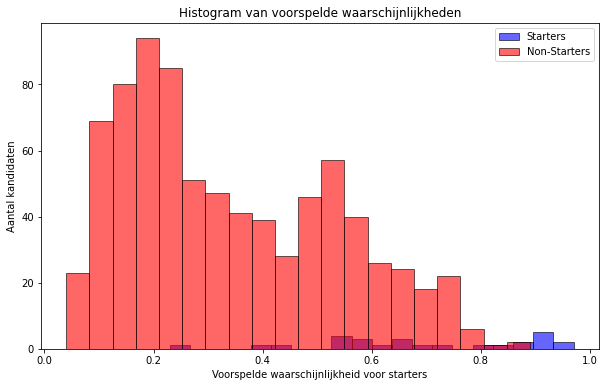

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Verdeel de waarschijnlijkheden op basis van de echte labels
y_proba_starters = y_proba_rfe[y_test == 1]
y_proba_non_starters = y_proba_rfe[y_test == 0]

# Plot het histogram
plt.figure(figsize=(10, 6))

# Histogram voor starters
plt.hist(y_proba_starters, bins=20, alpha=0.6, color='blue', label='Starters', edgecolor='black')

# Histogram voor non-starters
plt.hist(y_proba_non_starters, bins=20, alpha=0.6, color='red', label='Non-Starters', edgecolor='black')

# Voeg labels en een titel toe
plt.xlabel('Voorspelde waarschijnlijkheid voor starters')
plt.ylabel('Aantal kandidaten')
plt.title('Histogram van voorspelde waarschijnlijkheden')
plt.legend(loc='upper right')

# Toon de plot
plt.show()